In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pwd

# CSV : Desempenho das Vendas

# Informações do CSV :

No google analytics para acessar essa tabela: Conversões --> E-commerce --> Desempenho de vendas

Os dados são referentes a Desempenho de vendas, retirados do google analytics datados de 01/12/2020 até 23/08/2022...

Colunas:

1 - Receita: O total de receitas do comércio eletrónico na Web ou das transações na aplicação. Dependendo da sua implementação, isto pode incluir impostos e envio

2 - Imposto : Total das cobranças de imposto referentes às transações de comércio eletrónico.

3 - Frete: O total dos custos de envio com as transações de comércio eletrónico.

4 - Valor do Reembolso: Valor na moeda reembolsado para uma transação.

5 - Quantidade: Número de unidades vendidas em transações de comércio eletrónico.

# Funções

In [2]:
def replace_comma(x): #substitui ponto por nada
    return float(x.replace('R$', '').replace('.', '').replace(',', '.'))



In [10]:
def data_to_string(x): #20220126
    x = str(x)
    x = x[:-2]
    return x

# Organizando dataset

- Mudando valores em dinheiro para float e data para datetime
-


In [59]:
df_vendas = pd.read_csv('../raw_data/Google_Analytics/Analytics All Web Site Data Desempenho de vendas 20201201-20220823 (3).csv')
df_vendas.head()

,ID da transação,Data,Receita,Imposto,Frete,Valor do reembolso,Quantidade
0,11349,20220126.0,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",4.0
1,10720,20210412.0,"R$ 15,94","R$ 0,00","R$ 0,00","R$ 0,00",1.0
2,10735,20210417.0,"R$ 16,06","R$ 0,00","R$ 0,00","R$ 0,00",1.0
3,10742,20210419.0,"R$ 16,06","R$ 0,00","R$ 0,00","R$ 0,00",1.0
4,10732,20210416.0,"R$ 20,48","R$ 0,00","R$ 0,00","R$ 0,00",1.0


In [5]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID da transação     758 non-null    object 
 1   Data                758 non-null    float64
 2   Receita             759 non-null    object 
 3   Imposto             759 non-null    object 
 4   Frete               759 non-null    object 
 5   Valor do reembolso  759 non-null    object 
 6   Quantidade          759 non-null    float64
dtypes: float64(2), object(5)
memory usage: 41.6+ KB


In [12]:
#Convertendo data(float) para data(string)
df_vendas['Data'] = df_vendas['Data'].map(data_to_string)
df_vendas['Data']

0      20220126
1      20210412
2      20210417
3      20210419
4      20210416
         ...   
754    20211115
755    20211203
756    20211201
757    20211207
758           n
Name: Data, Length: 759, dtype: object

In [14]:
#Removendo ultima linha que representa soma da receita e quantidades
df_vendas = df_vendas.drop(index=758)

In [16]:
#Transformando data(string) para data(datetime)
df_vendas['Data']= pd.to_datetime(df_vendas['Data'], format='%Y%m%d')
df_vendas['Data']

0     2022-01-26
1     2021-04-12
2     2021-04-17
3     2021-04-19
4     2021-04-16
         ...    
753   2022-05-31
754   2021-11-15
755   2021-12-03
756   2021-12-01
757   2021-12-07
Name: Data, Length: 758, dtype: datetime64[ns]

In [17]:
df_vendas.drop(columns=['Imposto', 'Frete', 'Valor do reembolso'], inplace=True)

In [18]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID da transação  758 non-null    object        
 1   Data             758 non-null    datetime64[ns]
 2   Receita          758 non-null    object        
 3   Quantidade       758 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 23.8+ KB


In [19]:
df_vendas['Receita'] = df_vendas['Receita'].map(replace_comma)

In [20]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID da transação  758 non-null    object        
 1   Data             758 non-null    datetime64[ns]
 2   Receita          758 non-null    float64       
 3   Quantidade       758 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 23.8+ KB


In [22]:
df_vendas.tail()

,ID da transação,Data,Receita,Quantidade
753,11688,2022-05-31,1430.0,4.0
754,0,2021-11-15,1434.2,6.0
755,11225,2021-12-03,1436.7,5.0
756,11221,2021-12-01,1634.2,4.0
757,0,2021-12-07,2978.1,9.0


In [23]:
#Conferindo se a soma de receita e quantidade está de acordo com Google Analytics: TUDO OK
df_vendas.sum()

/tmp/ipykernel_8400/4185496646.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_vendas.sum()


ID da transação    1134910720107351074210732107541078601078910759...
Receita                                                     303241.8
Quantidade                                                    1044.0
dtype: object

In [24]:
#Verificando duplicatas
df_vendas.duplicated().sum() 

0

In [25]:
df_vendas.head()

,ID da transação,Data,Receita,Quantidade
0,11349,2022-01-26,0.00,4.0
1,10720,2021-04-12,15.94,1.0
2,10735,2021-04-17,16.06,1.0
3,10742,2021-04-19,16.06,1.0
4,10732,2021-04-16,20.48,1.0


In [35]:
df_vendas['Data'].dt.year.nunique()

3

In [37]:
df_vendas.tail()

,ID da transação,Data,Receita,Quantidade
753,11688,2022-05-31,1430.0,4.0
754,0,2021-11-15,1434.2,6.0
755,11225,2021-12-03,1436.7,5.0
756,11221,2021-12-01,1634.2,4.0
757,0,2021-12-07,2978.1,9.0


# Análise



In [ ]:
df_vendas.head()

<AxesSubplot:title={'center':'Total de receita anual do comércio eletrónico(R$) na Web até 23/08/2022'}, xlabel='Data'>

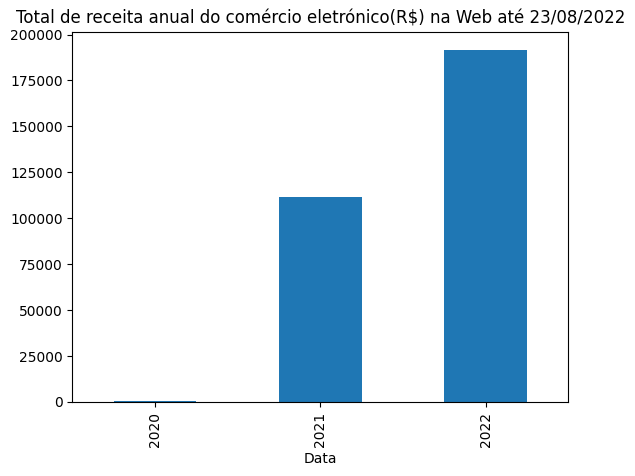

In [41]:
plt.title('Total de receita anual do comércio eletrónico(R$) na Web até 23/08/2022')
df_vendas['Receita'].groupby(df_vendas['Data'].dt.year).sum().plot(kind='bar')

<AxesSubplot:title={'center':'Quantidade de unidades vendidas no comércio eletrônico até 23/08/2022'}, xlabel='Data'>

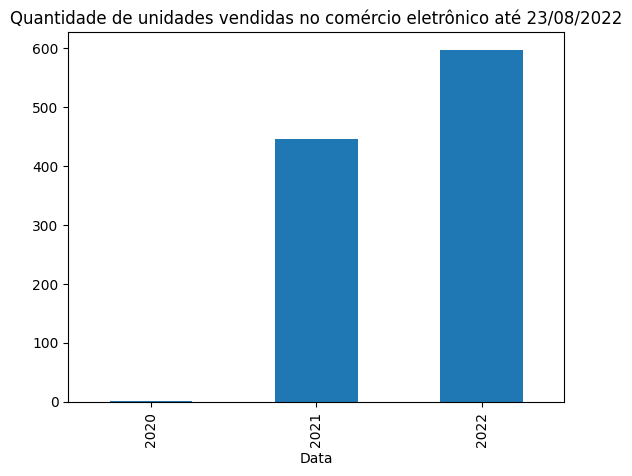

In [42]:
plt.title('Quantidade de unidades vendidas no comércio eletrônico até 23/08/2022')
df_vendas['Quantidade'].groupby(df_vendas['Data'].dt.year).sum().plot(kind='bar')

(array([173., 467.,  85.,  22.,   9.,   1.,   0.,   0.,   0.,   1.]),
 array([   0.  ,  297.81,  595.62,  893.43, 1191.24, 1489.05, 1786.86,
        2084.67, 2382.48, 2680.29, 2978.1 ]),
 <BarContainer object of 10 artists>)

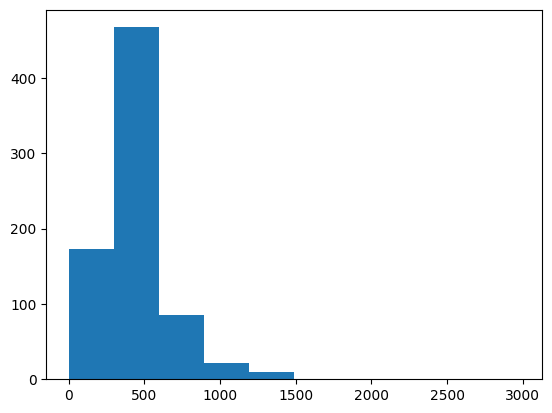

In [46]:
plt.hist(df_vendas['Receita'])

- quantidade x receita

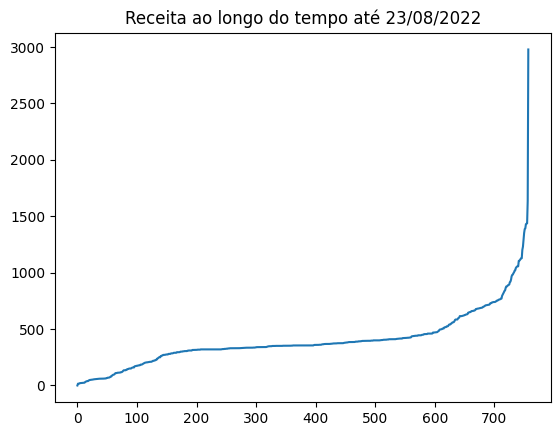

In [50]:
plt.title('Receita ao longo do tempo até 23/08/2022')
plt.plot(df_vendas['Receita'])

In [54]:
df_vendas['Receita'].head()

0     0.00
1    15.94
2    16.06
3    16.06
4    20.48
Name: Receita, dtype: float64

In [56]:
#df_vendas['Receita_Acum'] 
df_vendas['Receita_Acum'] = df_vendas['Receita'].cumsum()
df_vendas.head()

,ID da transação,Data,Receita,Quantidade,Receita_Acum
0,11349,2022-01-26,0.00,4.0,0.00
1,10720,2021-04-12,15.94,1.0,15.94
2,10735,2021-04-17,16.06,1.0,32.00
3,10742,2021-04-19,16.06,1.0,48.06
4,10732,2021-04-16,20.48,1.0,68.54


In [57]:
df_vendas['Quantidade_Acum'] = df_vendas['Quantidade'].cumsum()
df_vendas.head()

,ID da transação,Data,Receita,Quantidade,Receita_Acum,Quantidade_Acum
0,11349,2022-01-26,0.00,4.0,0.00,4.0
1,10720,2021-04-12,15.94,1.0,15.94,5.0
2,10735,2021-04-17,16.06,1.0,32.00,6.0
3,10742,2021-04-19,16.06,1.0,48.06,7.0
4,10732,2021-04-16,20.48,1.0,68.54,8.0


# CSV : Desempenho do produto